In [1]:
import os
import warnings

warnings.filterwarnings("ignore")

In [2]:
os.chdir("../")
%pwd

'/home/ubuntu/BigDataProject'

In [3]:
from src.config.configuration import ConfigurationManager
from src.components.data_tokenization import DataTokenization

config_manager = ConfigurationManager()
data_tokenization_config = config_manager.get_data_tokenization_config()
data_tokenization = DataTokenization(data_tokenization_config, config_manager.config.path)

data_tokenization_config

[2023-11-30 21:46:31,467: 47: logger: INFO: common:  yaml file: src/config/config.yaml loaded successfully]
[2023-11-30 21:46:31,471: 47: logger: INFO: common:  yaml file: src/params.yaml loaded successfully]
[2023-11-30 21:46:31,473: 47: logger: INFO: common:  yaml file: src/schema.yaml loaded successfully]


DataTokenizationConfig(max_length=16, model_checkpoint='ai-forever/rugpt3medium_based_on_gpt2')

# Tokenizing

In [6]:
%%time
data = data_tokenization.run_stage(is_new_data=False, return_tokenized_data=True)

[2023-11-30 21:41:08,977: 155: logger: INFO: data_tokenization:  === STARTING TOKENIZING STAGE ===]
[2023-11-30 21:41:08,978: 158: logger: INFO: data_tokenization:  Part1. Reading preprocessed data]
[2023-11-30 21:41:16,350: 160: logger: INFO: data_tokenization:  Part1. Data has been loaded]
[2023-11-30 21:41:16,351: 163: logger: INFO: data_tokenization:  Part2. Tokenizing preprocessed data]
[2023-11-30 21:41:16,393: 146: logger: INFO: common:  tensor file saved at: data/target]
[2023-11-30 21:41:16,394: 114: logger: INFO: data_tokenization:  1. Target data has been extracted and saved]
[2023-11-30 21:41:18,400: 127: logger: INFO: data_tokenization:  2. Tokenizer has been loaded]
[2023-11-30 21:45:26,317: 131: logger: INFO: data_tokenization:  3. Data has been tokenized]
[2023-11-30 21:45:26,692: 146: logger: INFO: common:  tensor file saved at: data/tokenized]
[2023-11-30 21:45:27,018: 146: logger: INFO: common:  tensor file saved at: data/tokenized]
[2023-11-30 21:45:27,018: 137: log

# Checking distribution of sizes in tokenized data

In [ ]:
import pandas as pd
from collections import Counter
from src.utils.plotters import simple_plot

In [14]:
sizes = data['attention_mask'].sum(axis=1).numpy()
sizes_cnt = Counter(sizes)
x = sorted(sizes_cnt.keys())
y = [list(sizes_cnt.values())[k]/len(data) for k in np.argsort(list(sizes_cnt.keys()))]
y2 = np.cumsum(y)

df = pd.DataFrame()
df['size'] = x
df['cnt'] = y
df['cumsum'] = y2

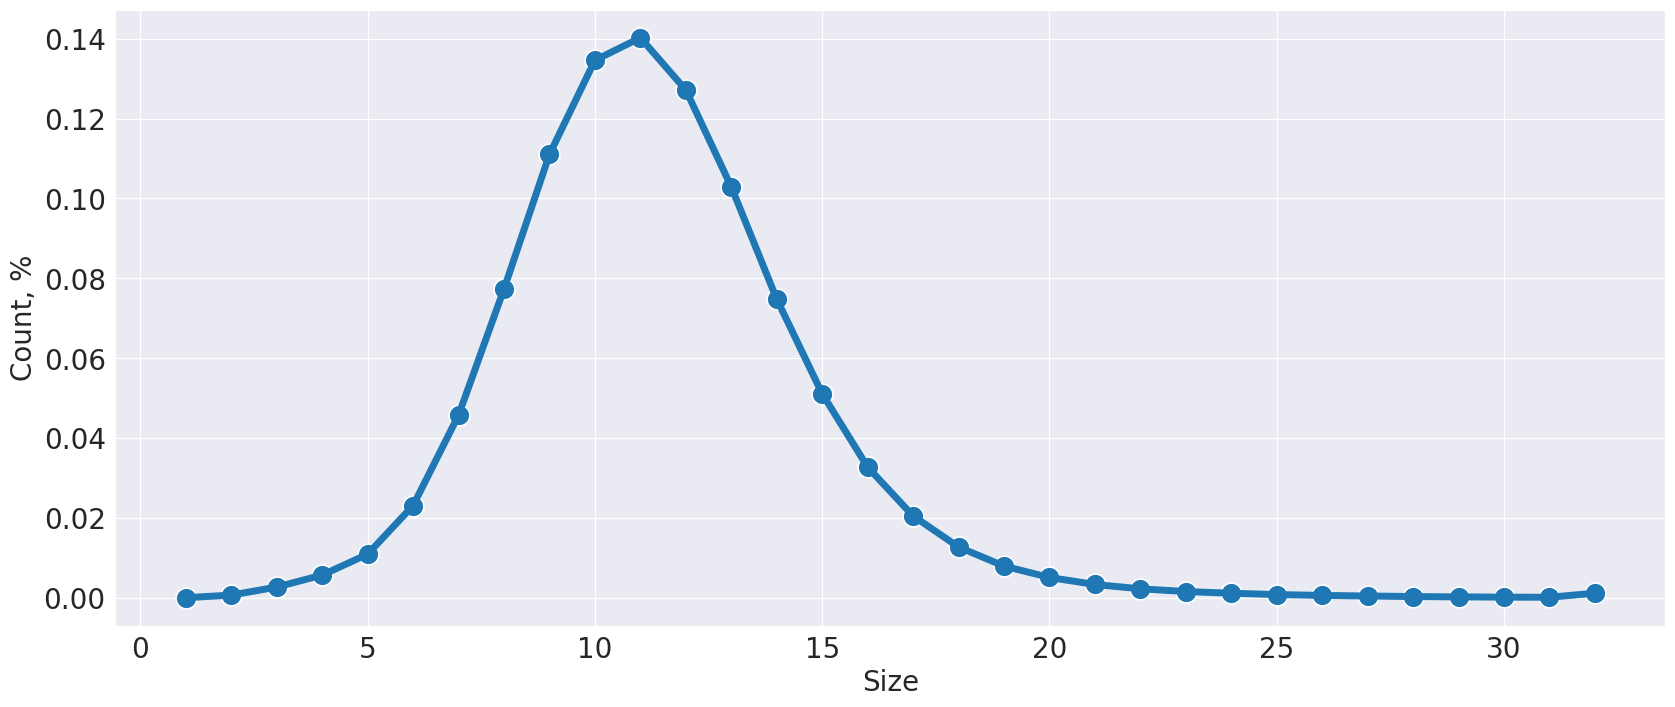

In [11]:
simple_plot(x, y, 'Size', 'Count, %', scatterplot=True)

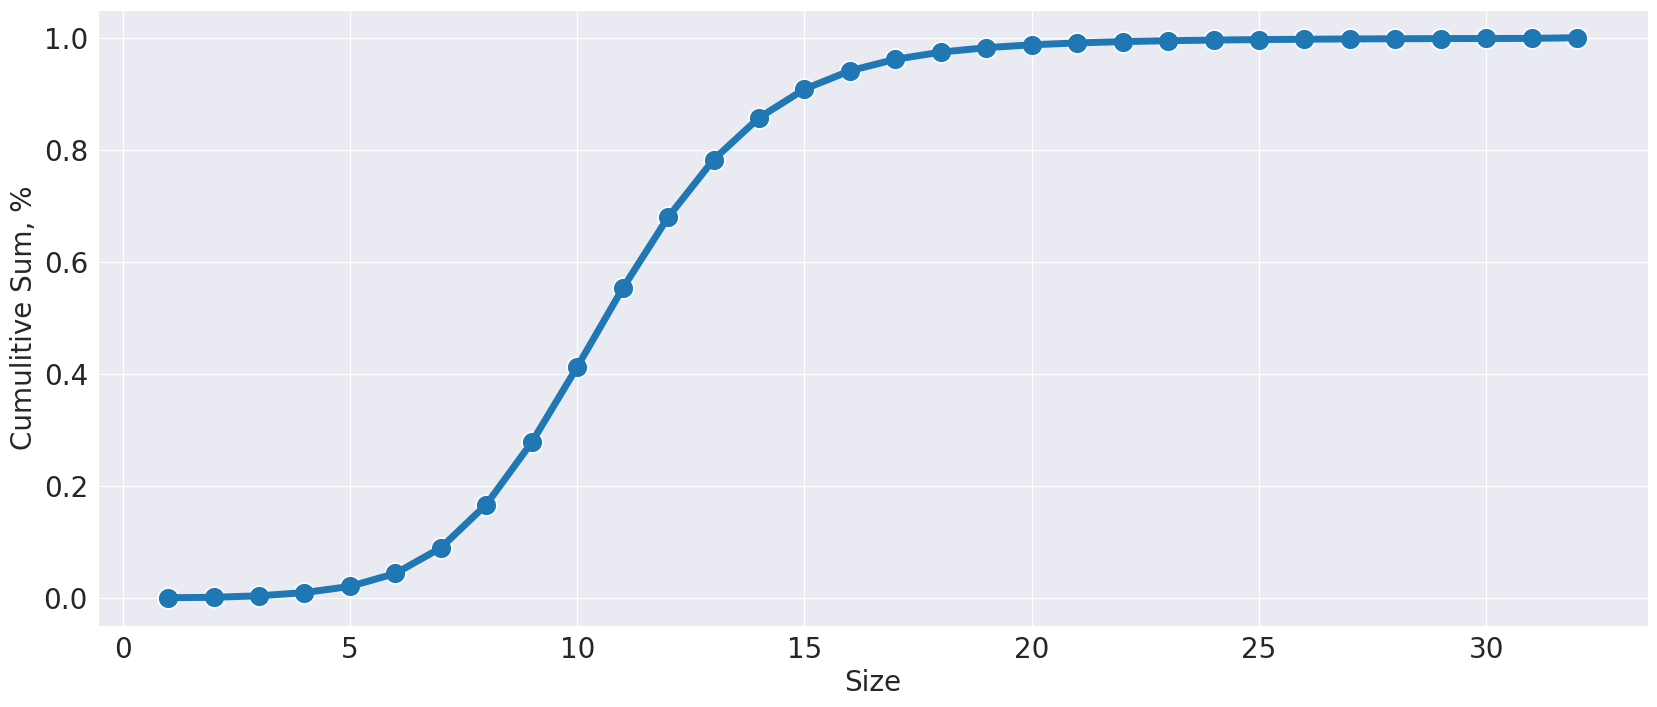

In [12]:
simple_plot(x, y2, 'Size', 'Cumulitive Sum, %', scatterplot=True)

In [15]:
df

,size,cnt,cumsum
0,1,0.000062,0.000062
1,2,0.000724,0.000785
2,3,0.002725,0.003510
3,4,0.005736,0.009246
4,5,0.010965,0.020211
5,6,0.023137,0.043348
6,7,0.045769,0.089117
7,8,0.077367,0.166484
8,9,0.111037,0.277521
9,10,0.134580,0.412102
